<a href="https://colab.research.google.com/github/duyguaran/graduation_thesis/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [6]:
!kaggle datasets download -d cdawn1/messy-vs-clean-room

 82% 55.0M/67.1M [00:00<00:00, 86.4MB/s]
100% 67.1M/67.1M [00:00<00:00, 91.5MB/s]


In [7]:
!unzip \*.zip  && rm *.zip

Archive:  messy-vs-clean-room.zip
  inflating: images/images/test/0.png  
  inflating: images/images/test/1.png  
  inflating: images/images/test/2.png  
  inflating: images/images/test/3.png  
  inflating: images/images/test/4.png  
  inflating: images/images/test/5.png  
  inflating: images/images/test/6.png  
  inflating: images/images/test/7.png  
  inflating: images/images/test/8.png  
  inflating: images/images/test/9.png  
  inflating: images/images/train/clean/0.png  
  inflating: images/images/train/clean/1.png  
  inflating: images/images/train/clean/10.png  
  inflating: images/images/train/clean/11.png  
  inflating: images/images/train/clean/12.png  
  inflating: images/images/train/clean/13.png  
  inflating: images/images/train/clean/14.png  
  inflating: images/images/train/clean/15.png  
  inflating: images/images/train/clean/16.png  
  inflating: images/images/train/clean/17.png  
  inflating: images/images/train/clean/18.png  
  inflating: images/images/train/clean/1

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [12]:
train_messy = "/content/drive/MyDrive/kaggle/images/train/messy"
train_clean= "/content/drive/MyDrive/kaggle/images/train/clean"
test_messy= "/content/drive/MyDrive/kaggle/images/val/clean"
test_clean= "/content/drive/MyDrive/kaggle/images/val/messy"
image_size = 128

100%|██████████| 96/96 [00:00<00:00, 143.19it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

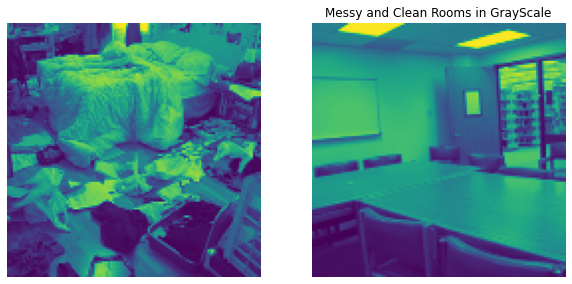

In [26]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [27]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [28]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [29]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 141.54it/s]


In [30]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [31]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [32]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [33]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [43]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [44]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


In [45]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [46]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [47]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [48]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [49]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: nan
Cost after iteration 10: 0.186079
Cost after iteration 20: 0.106454
Cost after iteration 30: 0.075681
Cost after iteration 40: 0.060999
Cost after iteration 50: 0.051793
Cost after iteration 60: 0.045209
Cost after iteration 70: 0.040213
Cost after iteration 80: 0.036289
Cost after iteration 90: 0.033124
Cost after iteration 100: 0.030514
Cost after iteration 110: 0.028318
Cost after iteration 120: 0.026440
Cost after iteration 130: 0.024811
Cost after iteration 140: 0.023379


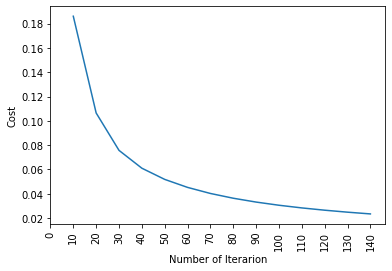

train accuracy: 99.44444444444444 %
test accuracy: 87.5 %


In [53]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [51]:
from sklearn import linear_model #logistic regression with sklearn
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.96875 
train accuracy: 1.0 
